In [92]:
import numpy as np
import matplotlib.pyplot as plt

## Applying PCA to reduce dimensions

In [93]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [75]:
dataSet=load_digits()

In [123]:
def PCA_(X):
    PCAModel=PCA(n_components=X)
    data=PCAModel.fit_transform(dataSet.data)
    return PCAModel,data

In [124]:
PCA16,data16=PCA_(16)
PCA24,data24=PCA_(24)
PCA40,data40=PCA_(40)

# Part-1: Kernel Density Estimation

In [110]:
from sklearn.neighbors import KernelDensity as KD
from sklearn.model_selection import GridSearchCV, LeaveOneOut

In [111]:
def KDE(data):
    
    param={'bandwidth':np.logspace(-1,1,20)}
    grid=GridSearchCV(KD(kernel='gaussian'),param,cv=5)
    grid.fit(data)
    
    print(grid.best_params_)
    return grid.best_estimator_

In [112]:
KDE16=KDE(data16)

{'bandwidth': 3.79269019073225}


In [113]:
KDE24=KDE(data24)

{'bandwidth': 2.9763514416313175}


In [114]:
KDE40=KDE(data40)

{'bandwidth': 2.3357214690901213}


# Part-2: GMM Based Density Estimation

In [116]:
from sklearn.mixture import GaussianMixture as GMM

In [117]:
def GDE(data):
    
    components=np.arange(50,200,10)
    models=[GMM(c,covariance_type='full',random_state=0) for c in components]
    BICS=[model.fit(data).bic(data) for model in models]
    plt.plot(components,BICS)
    
    best=components[np.argmin(BICS)]
    print("Best fit is: ",best)
    
    gmm=GMM(best,covariance_type='full',random_state=0)
    gmm.fit(data)
    return gmm

Best fit is:  160


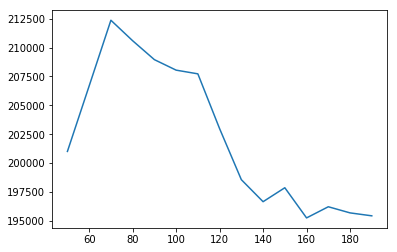

In [118]:
GDE16=GDE(data16)

Best fit is:  130


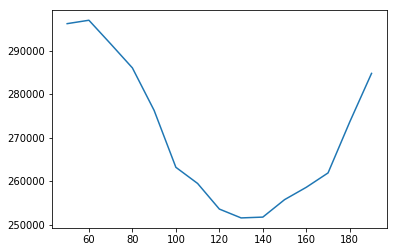

In [119]:
GDE24=GDE(data24)

Best fit is:  80


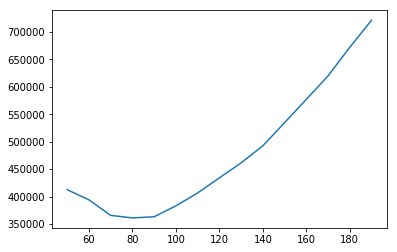

In [120]:
GDE40=GDE(data40)

# Part-3: Plotting new Points generated by Inverse Transform of PCA

In [135]:
def plotData(data):
    fig, ax = plt.subplots(8, 6, figsize=(10, 10),subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.07, wspace=0.07)
    for a, b in enumerate(ax.flat):
        im = b.imshow(data[a].reshape(8, 8))
        im.set_clim(0, 16)

## KDE

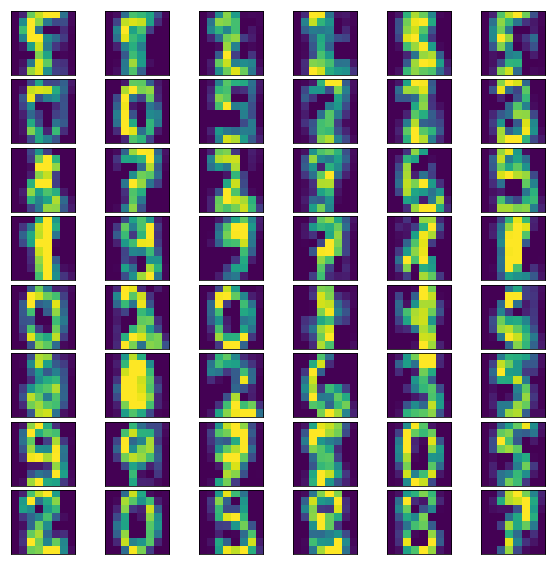

In [136]:
plotData(PCA16.inverse_transform(KDE16.sample(48)))

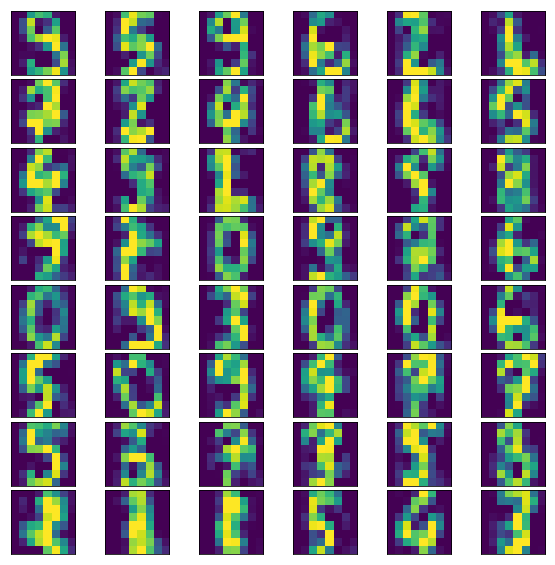

In [137]:
plotData(PCA24.inverse_transform(KDE24.sample(48)))

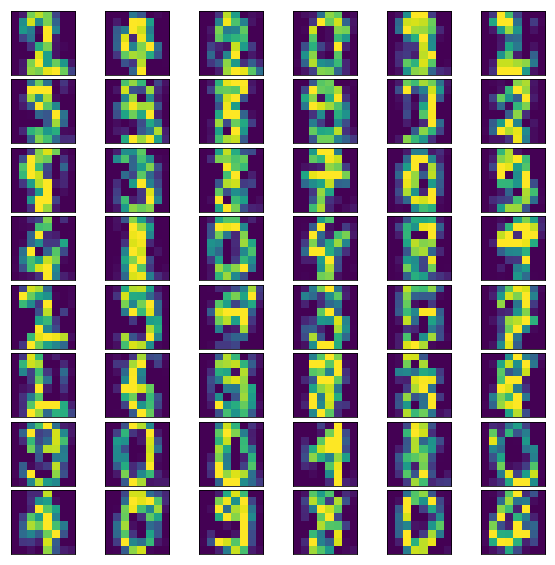

In [138]:
plotData(PCA40.inverse_transform(KDE40.sample(48)))

## GMM

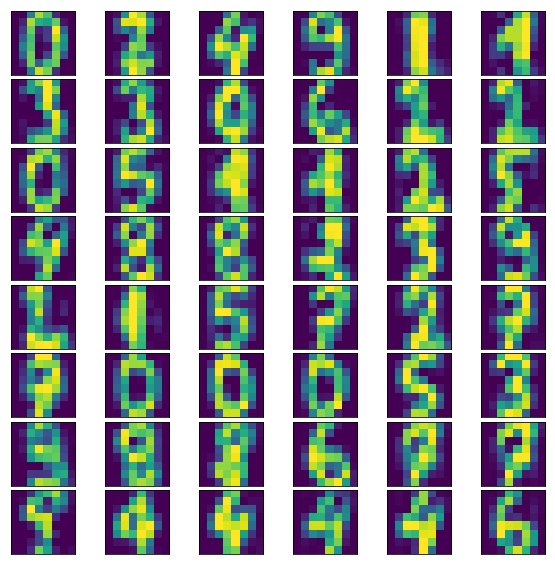

In [140]:
plotData(PCA16.inverse_transform(GDE16.sample(48)[0]))

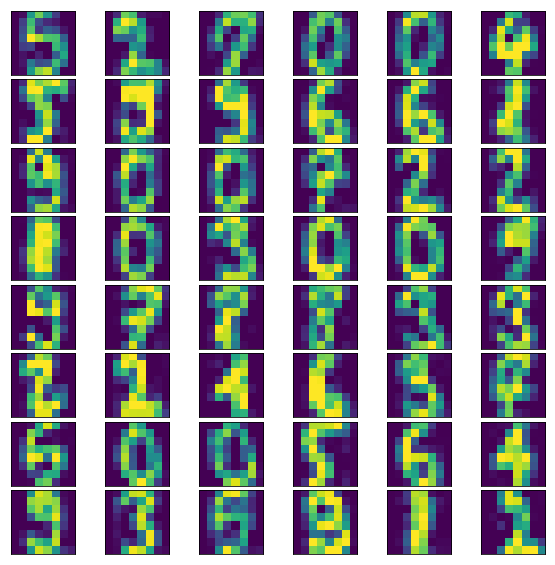

In [143]:
plotData(PCA24.inverse_transform(GDE24.sample(48)[0]))

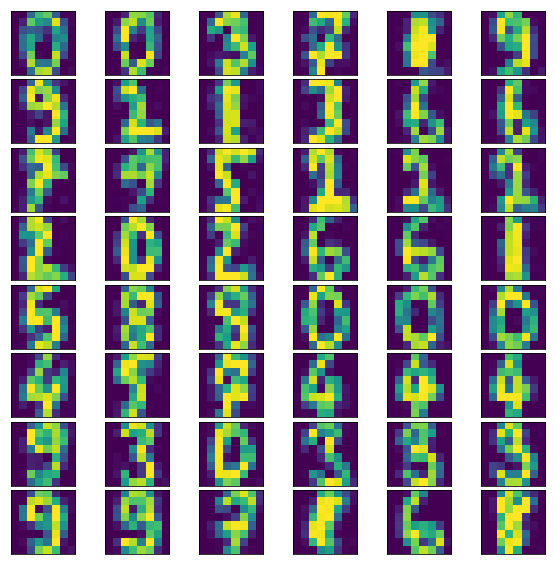

In [144]:
plotData(PCA40.inverse_transform(GDE40.sample(48)[0]))